## Setting up GCP

Set up an account here: https://console.cloud.google.com/

- Use any email account to sign up
- Choose a name for your GCP Project
- You can retrieve your Project ID by clicking the button shown (in the red box)

**Note:** GCP project ID has to be globally unique across all GCP users.


### Billing Account

You might be prompted to create a billing account by entering your credit card details*.

Failure to do so may result in errors in subsequent lessons:
- **Lesson 2.2:** When downloading a file from GCS, you may encounter a "403 error: Billing account not set up."
- **Lesson 2.5:** A similar error may occur when creating tables in BigQuery.
- Use the following link to ensure that your billing account is linked to your project: [Verify Billing](https://console.cloud.google.com/billing)

## Install gcloud CLI

### Installation Steps

- **Mac users:** Follow instructions here: https://cloud.google.com/sdk/docs/install
- **Windows WSL users:** Follow instructions here: https://cloud.google.com/sdk/docs/downloads-snap

### Authentication

Once `gcloud init` is done, authenticate your computer to your GCP account by running:

**WSL users:**
```bash
gcloud auth application-default login
```

**Mac users:**
```bash
./google-cloud-sdk/bin/gcloud auth application-default login
```

Copy and paste the link provided into a browser. Please log in using the same email account you used to set up your GCP account.

### Test Your Setup (Optional)

Now that you are authenticated, test your setup by running:

**WSL users:**
```bash
bq query --use_legacy_sql=false "SELECT name FROM bigquery-public-data.usa_names.usa_1910_current LIMIT 10"
```

**Mac users:**
```bash
./google-cloud-sdk/bin/bq query --use_legacy_sql=false "SELECT name FROM bigquery-public-data.usa_names.usa_1910_current LIMIT 10"
```

You should see the query results as output.

$ bq query --use_legacy_sql=false "SELECT name FROM bigquery-public-data.usa_names.usa_1910_current LIMIT 10"


```
+----------+
|   name   |
+----------+
| Mary     |
| Annie    |
| Anna     |
| Margaret |
| Helen    |
| Elsie    |
| Lucy     |
| Dorothy  |
| Mary     |
| Margaret |
+----------+
```

## Give Yourself 'BigQuery Admin' Rights

This is in preparation for the lesson on DBT (Lesson 2.5).

**IAM** (Identity and Access Management) allows you to manage access control for your GCP resources.

### Steps:

1. Search for 'IAM' in the top search bar
2. Click on the 'Edit principal' button next to your email
3. Click '+ Add another role' and search for 'BigQuery Admin'
4. Click 'Save'

You should see the updated permissions reflected in your IAM settings.

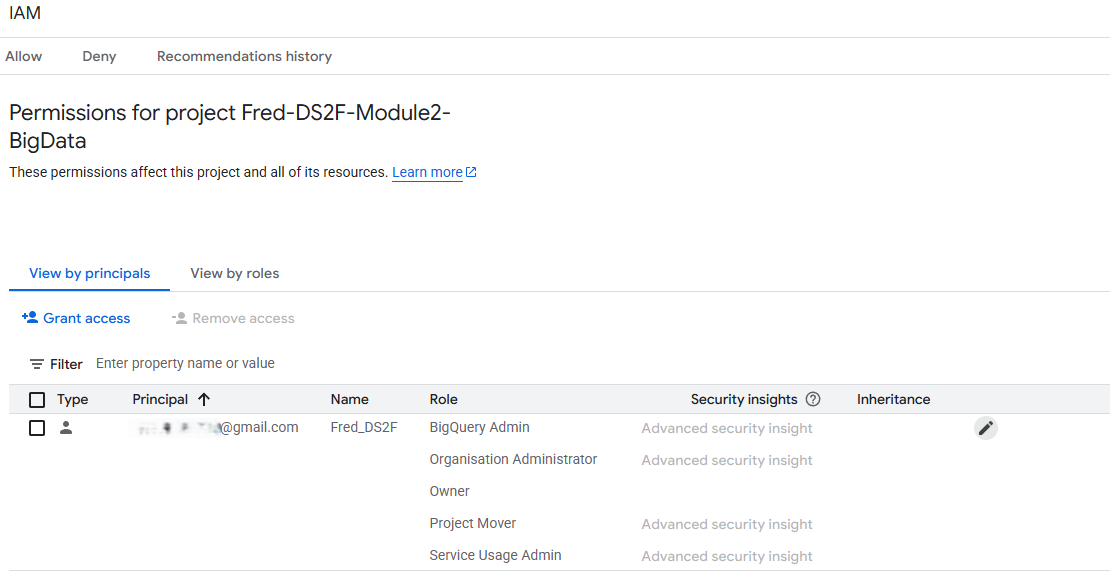

## Create 'snapshots' Dataset in BigQuery

This is in preparation for the lesson on DBT (Lesson 2.5).

### Steps:

1. Go to BigQuery
2. Click on the 3 dots next to your project ID
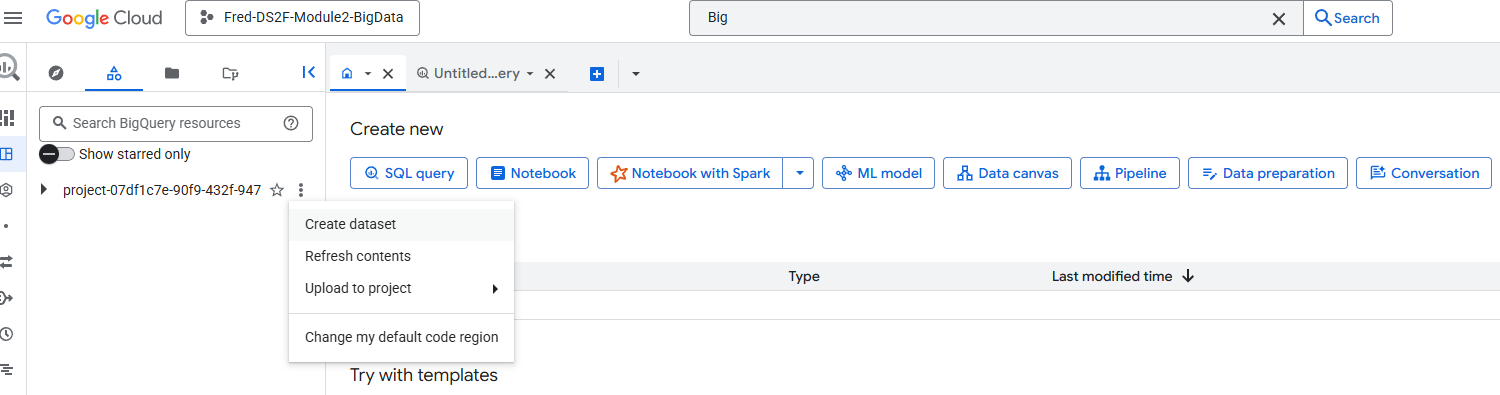

3. Click 'Create dataset'
4. Enter `snapshots` as the Dataset ID
5. Use the default location type ('Multi-region' - 'US')
6. Click 'Create dataset'
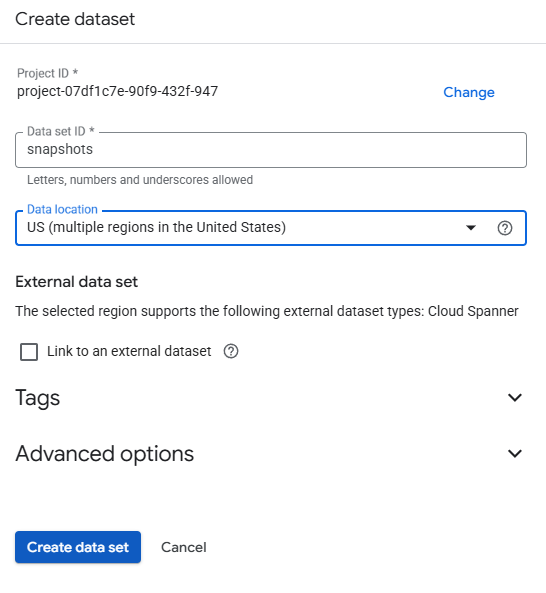

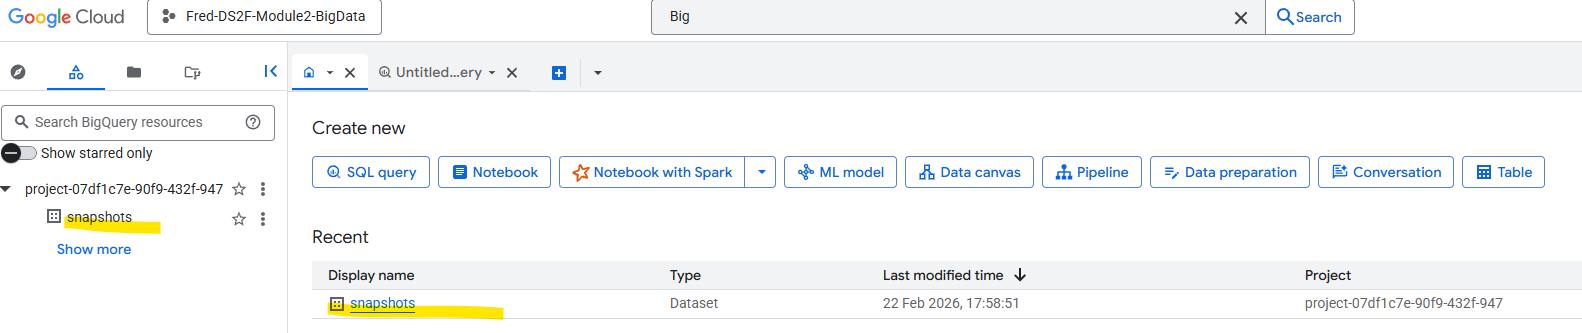

## Setting up a service account

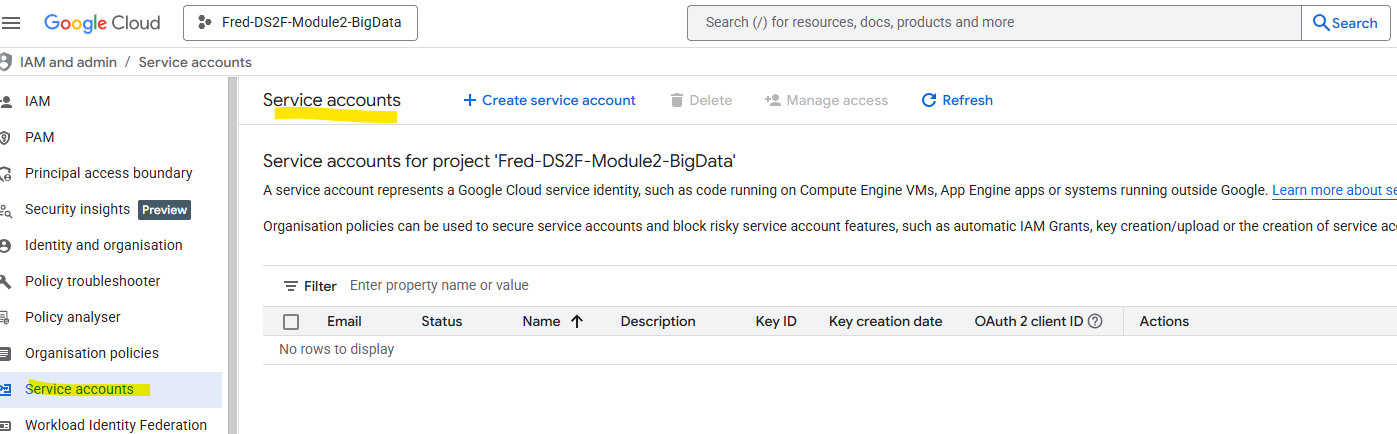

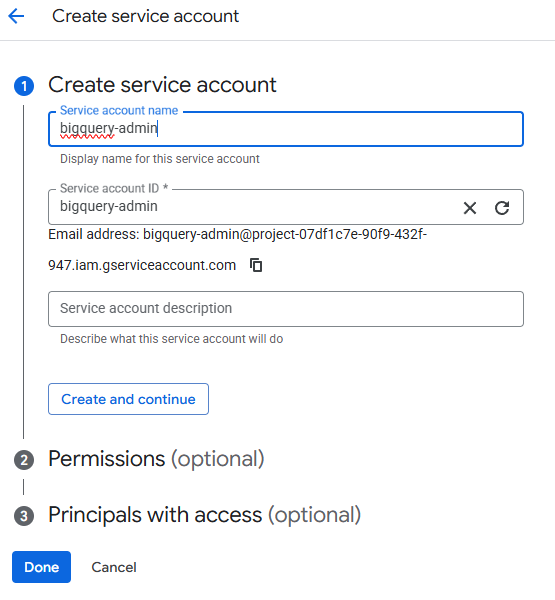

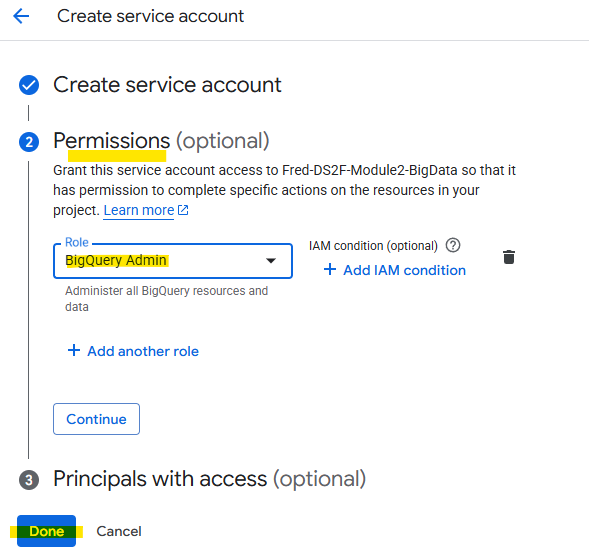

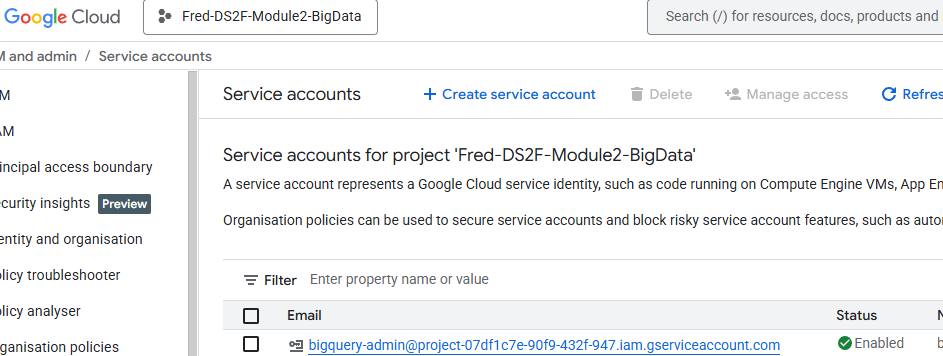

## Create Key

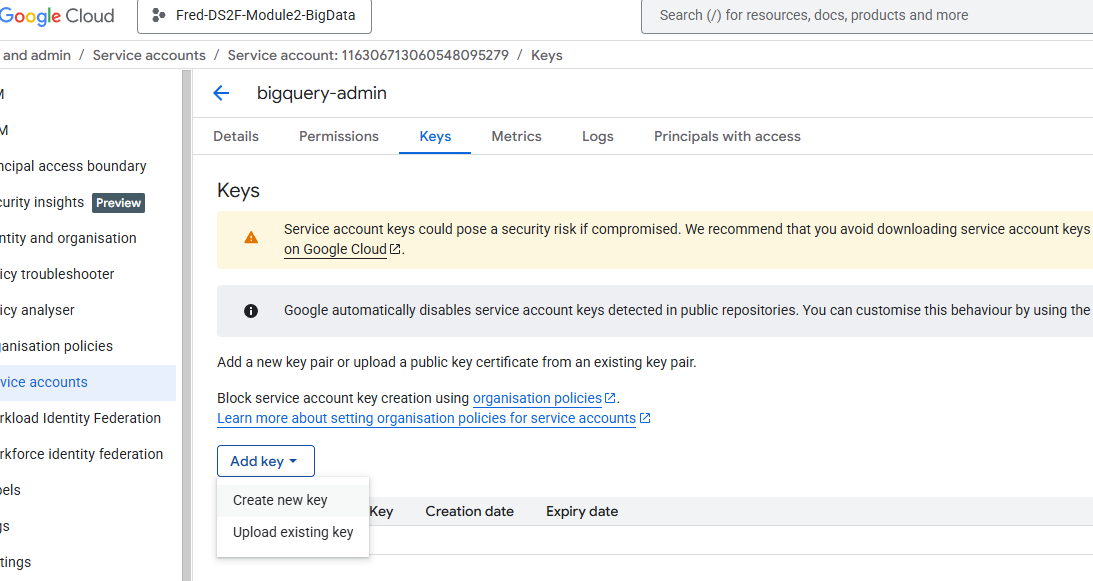

### Steps:

1. Select 'JSON' and click 'Create'
2. A JSON file will be downloaded to your computer
3. Put it into your meltano project folder (lesson 2.6)

## Encounter Error When Clicking 'Create'

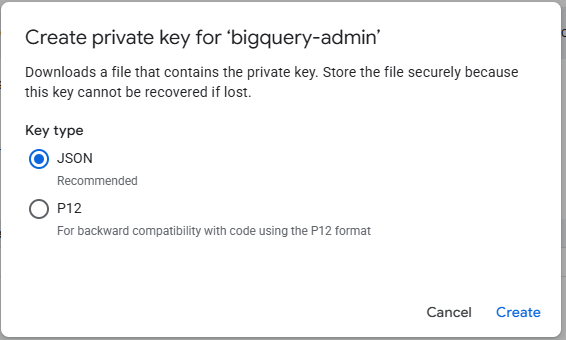

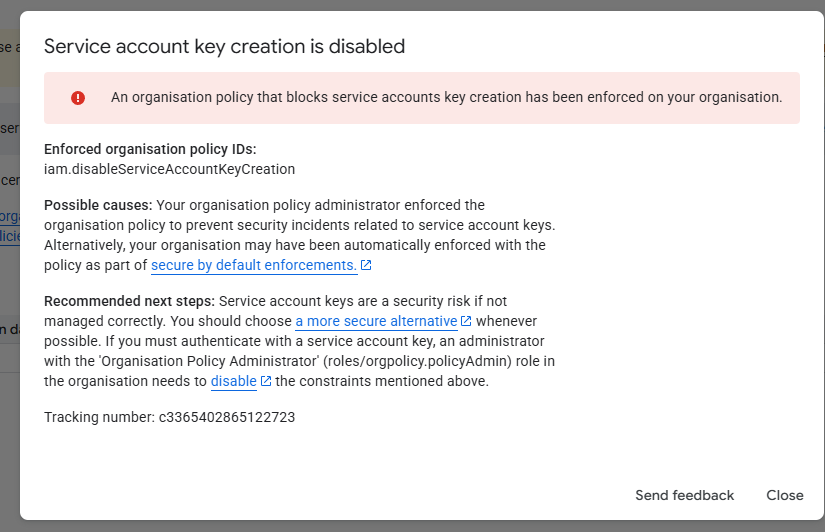

Organization ID: 159833191038

### List Organization Policies

To check whether the Google Cloud security baseline constraints are enforced on your organization, run:

```bash
gcloud resource-manager org-policies list --organization=ORGANIZATION_ID
```

Example:

```bash
gcloud resource-manager org-policies list --organization=159833191038
```

Expected output:

```text
CONSTRAINT                                                      LIST_POLICY  BOOLEAN_POLICY  ETAG
constraints/compute.setNewProjectDefaultToZonalDNSOnly          -            SET             COiQ68wGEOjt3aMC
constraints/iam.disableServiceAccountKeyUpload                  -            SET             COiQ68wGEMDL0aMC
constraints/iam.disableServiceAccountKeyCreation                -            SET             COiQ68wGENCZ0qMC
constraints/iam.automaticIamGrantsForDefaultServiceAccounts     -            SET             COiQ68wGENCiz6MC
constraints/storage.uniformBucketLevelAccess                    -            SET             COiQ68wGEPDk7aMC
constraints/compute.restrictProtocolForwardingCreationForTypes  SET          -               COiQ68wGEPiqt6QC
```

### Disable Organization Policies

To disable or delete an organization policy, run:

```bash
gcloud org-policies delete CONSTRAINT_NAME --organization=ORGANIZATION_ID
```

For the previous error, disable/delete this constraint:

`iam.disableServiceAccountKeyCreation`

Example:

```bash
gcloud org-policies delete iam.disableServiceAccountKeyCreation --organization=159833191038
```

Sample output:

```text
API [orgpolicy.googleapis.com] not enabled on project [project-07df1c7e-90f9-432f-947].
Would you like to enable and retry (this will take a few minutes)? (y/N)?  y

Enabling service [orgpolicy.googleapis.com] on project [project-07df1c7e-90f9-432f-947]...
Operation "operations/acat.p2-515446202911-d2faccba-2463-486f-8c37-3ee24ee3bcd0" finished successfully.
ERROR: (gcloud.org-policies.delete) PERMISSION_DENIED: Permission 'orgpolicy.policies.delete' denied on resource '//orgpolicy.googleapis.com/organizations/159833191038/policies/iam.disableServiceAccountKeyCreation' (or it may not exist).
This command is authenticated as fred.ds2f2026@gmail.com which is the active account specified by the [core/account] property.
- '@type': type.googleapis.com/google.rpc.ErrorInfo
  domain: orgpolicy.googleapis.com
  metadata:
    permission: orgpolicy.policies.delete
    resource: organizations/159833191038/policies/iam.disableServiceAccountKeyCreation
  reason: IAM_PERMISSION_DENIED
```

## Generating a GitHub Personal Access Token (PAT)

**PAT** = Personal Access Token - a secure way to authenticate with GitHub instead of using passwords.

This is in preparation for the lesson on data extraction (Lesson 2.4).

### Steps:

#### 1. Go to GitHub Settings

1. Sign in to your GitHub account
2. Click your profile picture in the top-right corner → Settings

#### 2. Access the Token Settings

1. In the left-hand menu, scroll down to **Developer Settings**
2. Click **Personal access tokens** → choose **Tokens (classic)** (older method, works for most CLI and API tasks)

#### 3. Generate the Token

1. Click **Generate new token** → **Generate new token (classic)**
2. Give it a note (e.g., "My Laptop Git Access")
3. Set expiration (recommended: 90 days)
4. Select scopes (permissions):
   - You can tick all the boxes
5. Click **Generate token**

#### 4. Save Your Token

**Important:** GitHub shows it only once. Copy it and store it securely (e.g., password manager).

#### 5. Use the Token

When Git asks for your password during `git push` or `git clone`, use:
- **Username:** your GitHub username
- **Password:** your token (paste it)